In [ ]:
# Debug Nov. 10th, 2020: the new version of statannot automatically applies bonferroni correction. To obtain original result, need to add parameter comparisons_correction=None 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/phastCons/phastcons-celltype.xlsx')

In [22]:
df[df['Celltype']=='Neuron']['Avg_phastCons'].values

array([0.193231 , 0.0902024, 0.109885 , ..., 0.0635934, 0.0711811,
       0.0388862])

### Check whether phastCons are normally distributed

In [4]:
import matplotlib

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
matplotlib.rcParams['figure.dpi']= 300

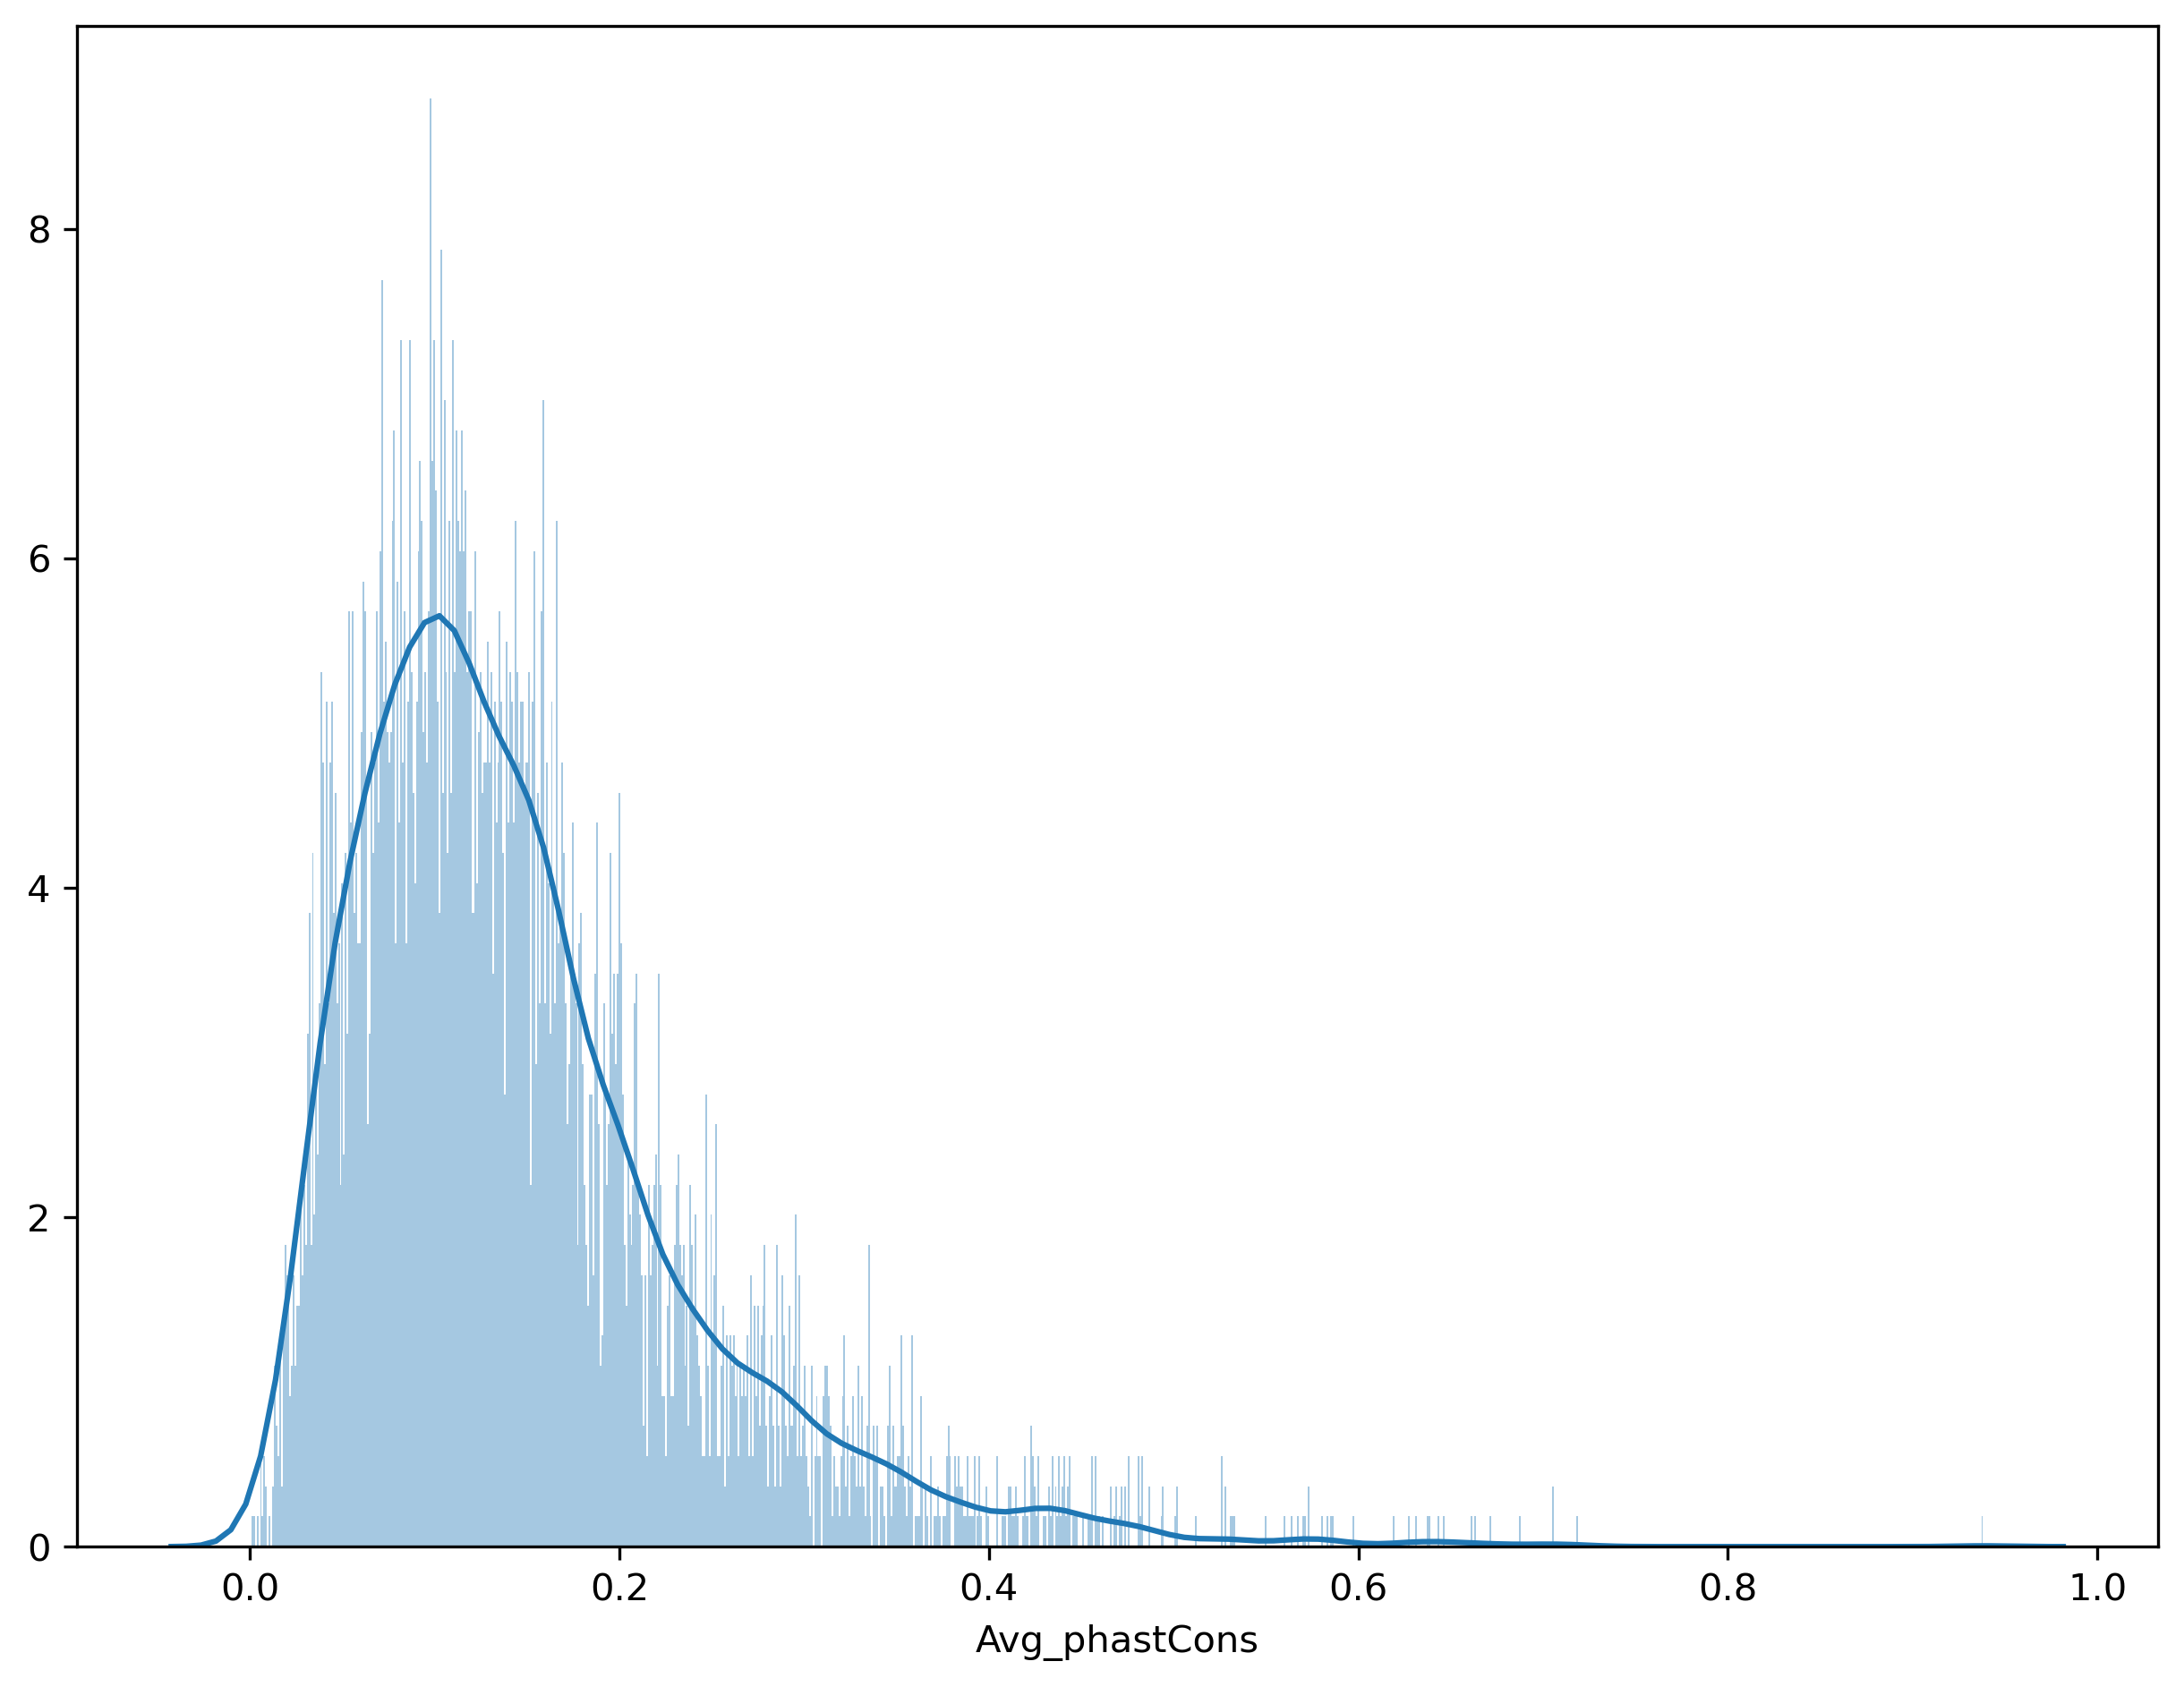

In [8]:
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax = sns.distplot(df['Avg_phastCons'],bins=1000)
# _=ax.set(xscale='log')
plt.show()

In [9]:
import statsmodels.api as sm
import pylab

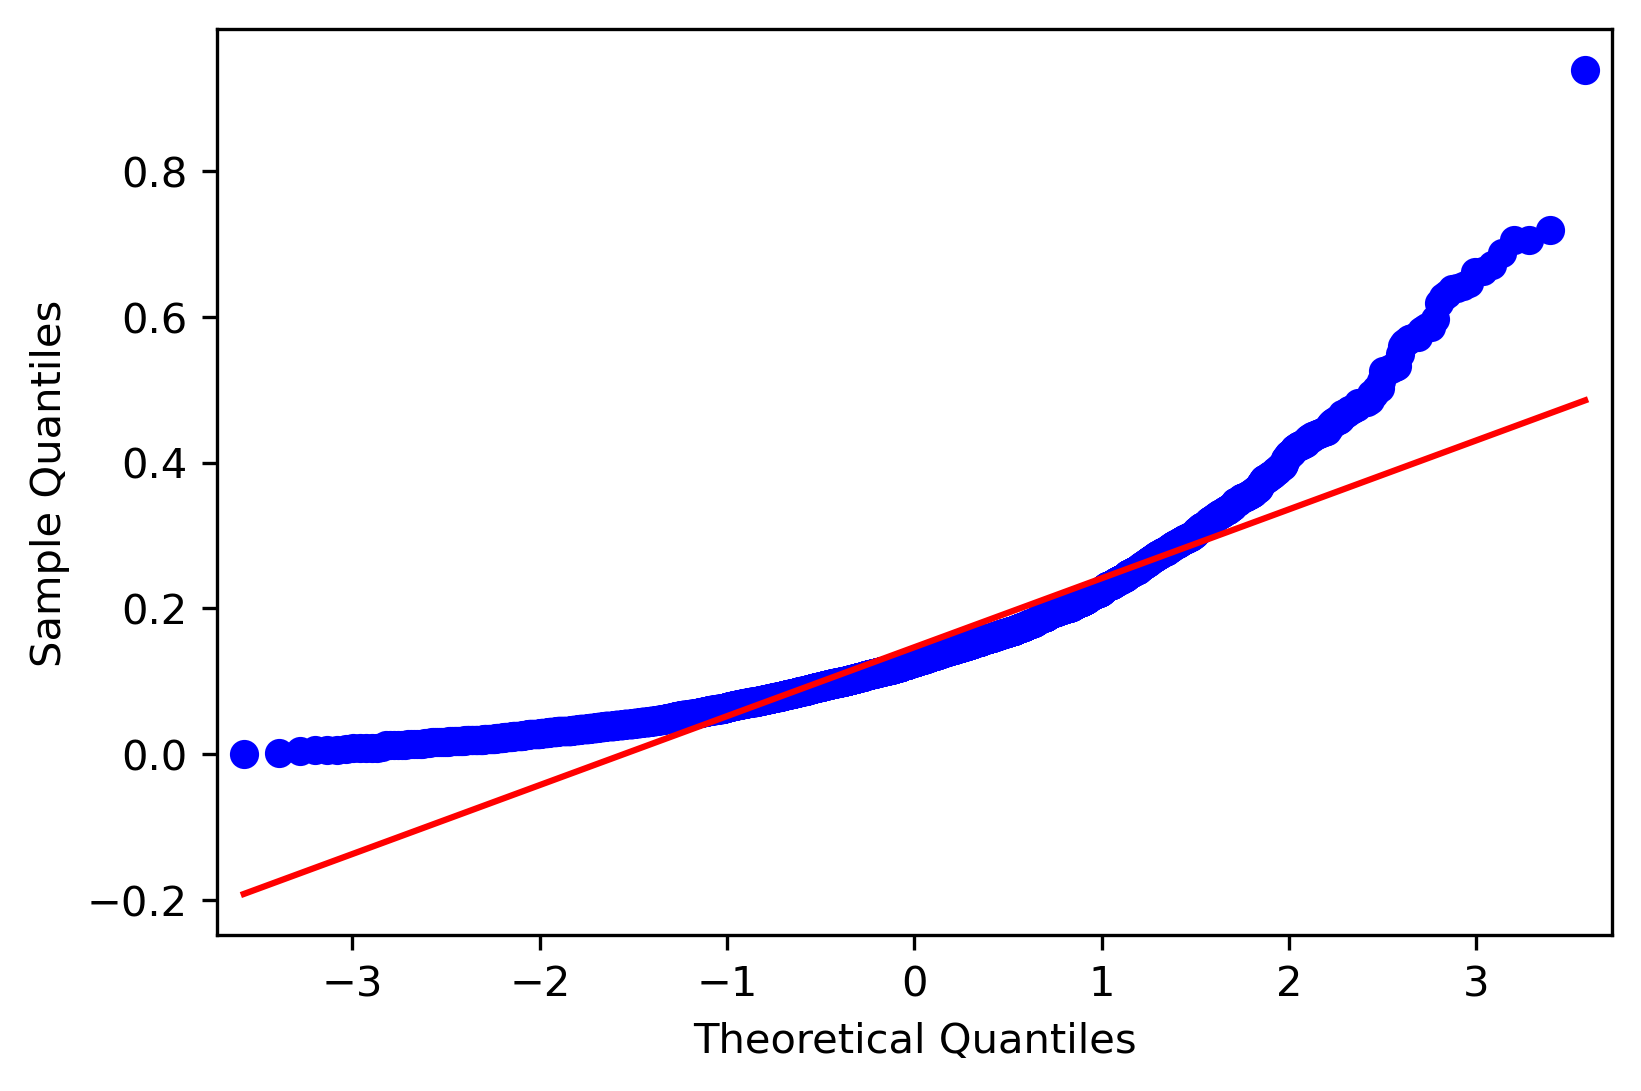

In [10]:
sm.qqplot(df['Avg_phastCons'], line='s')
pylab.show()

We see that phastCons are not normally distributed. Non-parametric approaches will be used for analyzing phastCons. 

### Mann Whitney U test between pairs of cell types

In [29]:
from scipy import stats

In [24]:
stats.mannwhitneyu(
        df[df['Celltype']=='Glia']['Avg_phastCons'].values,
        df[df['Celltype']=='Neuron']['Avg_phastCons'].values,
        alternative="two-sided")

MannwhitneyuResult(statistic=725052.0, pvalue=0.0030040013036052495)

In [25]:
stats.mannwhitneyu(
        df[df['Celltype']=='Endothelia']['Avg_phastCons'].values,
        df[df['Celltype']=='Neuron']['Avg_phastCons'].values,
        alternative="two-sided")

MannwhitneyuResult(statistic=571684.0, pvalue=0.0408171842462815)

In [30]:
stats.mannwhitneyu(
        df[df['Celltype']=='Endothelia']['Avg_phastCons'].values,
        df[df['Celltype']=='Glia']['Avg_phastCons'].values,
        alternative="two-sided")

MannwhitneyuResult(statistic=572923.0, pvalue=0.466136475634502)

In [11]:
palette={'Endothelia':'tab:blue','Glia':'tab:green','Neuron':'tab:red','Oligodendrocyte':'lightblue','Astrocyte':'lightgreen','Microglia':'tab:orange'}

In [12]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Neuron v.s. Endothelia: Mann-Whitney-Wilcoxon test two-sided, P_val=4.082e-02 U_stat=6.328e+05
Endothelia v.s. Glia: Mann-Whitney-Wilcoxon test two-sided, P_val=4.661e-01 U_stat=5.729e+05
Neuron v.s. Glia: Mann-Whitney-Wilcoxon test two-sided, P_val=3.004e-03 U_stat=8.319e+05


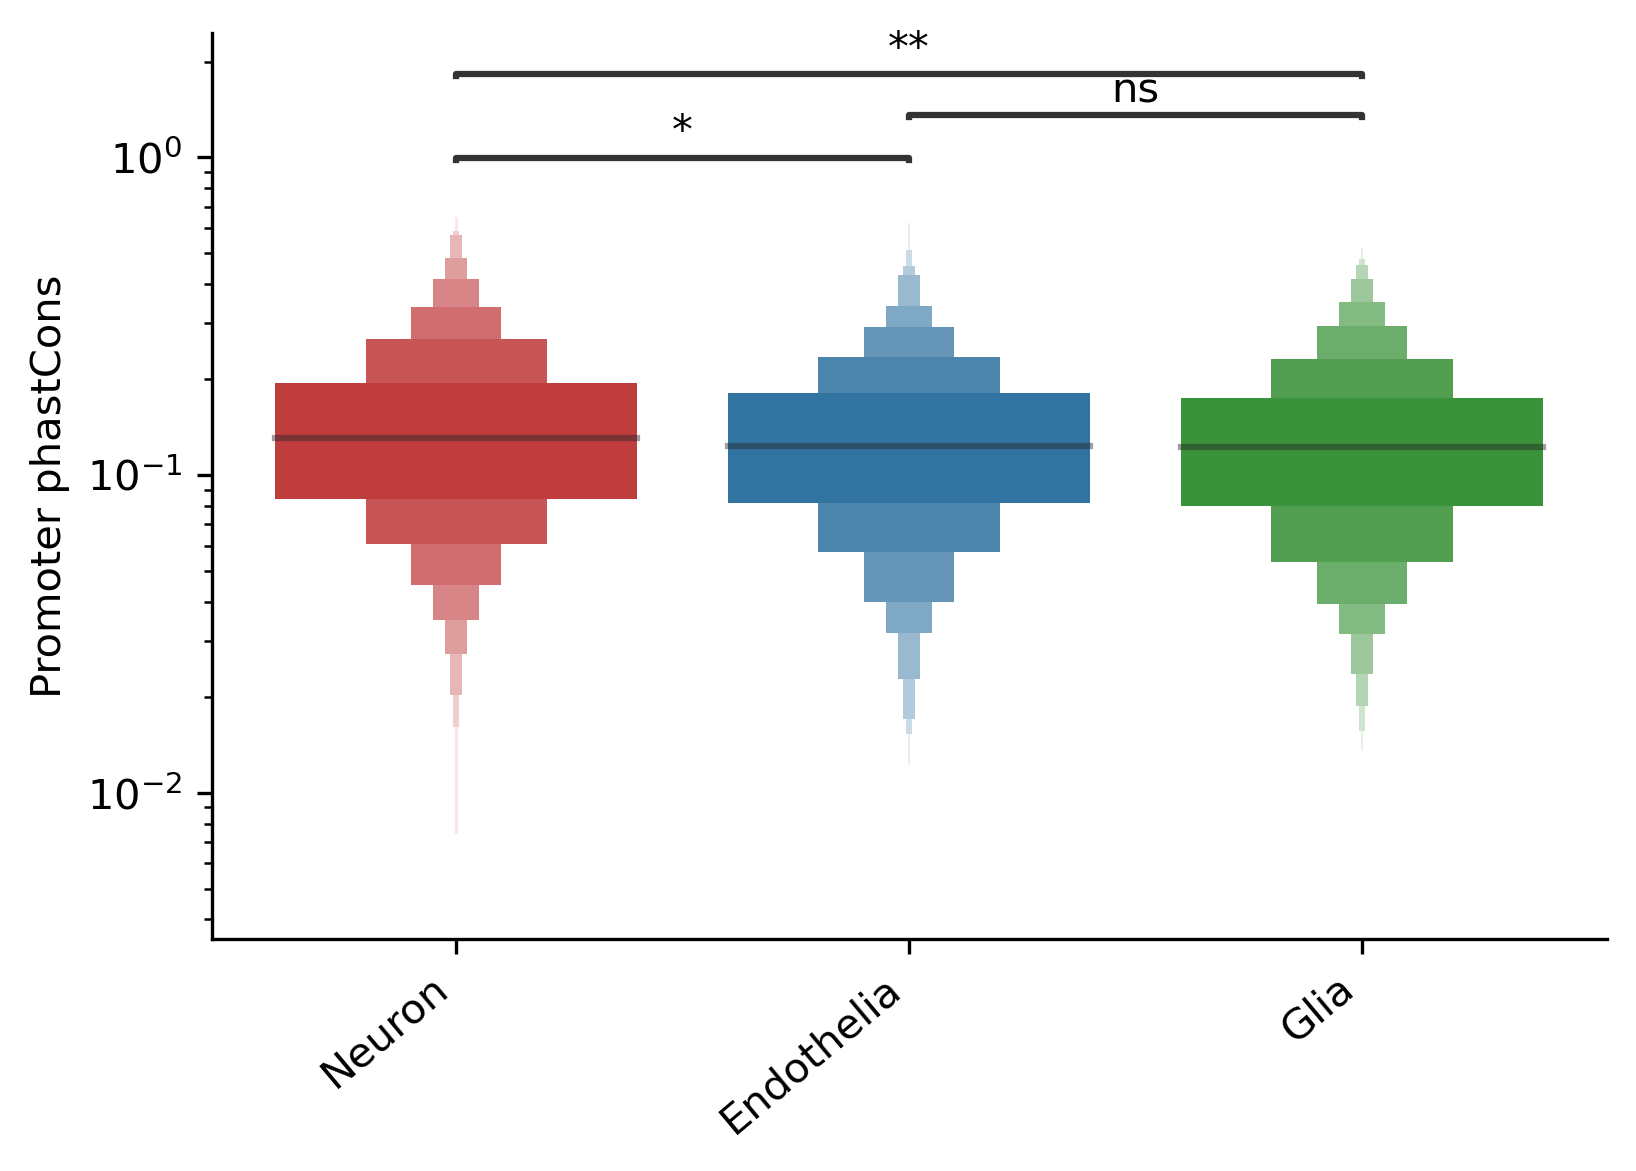

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set(yscale='log')
# ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='Avg_phastCons',
                 data=df[df['Celltype'].isin(['Neuron','Glia','Endothelia'])],
                 palette=palette,showfliers=False,outlier_prop=0,
                 order=['Neuron','Endothelia','Glia'])

# order=['Astrocyte','Neuron','Endothelia','Oligodendrocyte','Microglia','Glia']

ax.set(ylabel='Promoter phastCons',xlabel='')
sns.despine()
ax.set(yscale='log')
# Debug Nov. 10th, 2020: add comparisons_correction parameter
stats = add_stat_annotation(ax=ax,data=df,x="Celltype", y="Avg_phastCons",
                        box_pairs=[("Endothelia", "Neuron"),
                                   ("Endothelia", "Glia"),
                                   ("Glia","Neuron")],
                        test='Mann-Whitney', text_format='star',
                        comparisons_correction=None,
                        loc='outside', verbose=2, 
                        order=['Neuron','Endothelia','Glia'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.autoscale()
plt.savefig('../figures/MannWhitney/phastcons/NEG.svg')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Astrocyte v.s. Neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=5.240e-01 U_stat=5.380e+05
Neuron v.s. Oligodendrocyte: Mann-Whitney-Wilcoxon test two-sided, P_val=3.442e-02 U_stat=3.529e+05
Neuron v.s. Microglia: Mann-Whitney-Wilcoxon test two-sided, P_val=2.158e-02 U_stat=7.225e+05


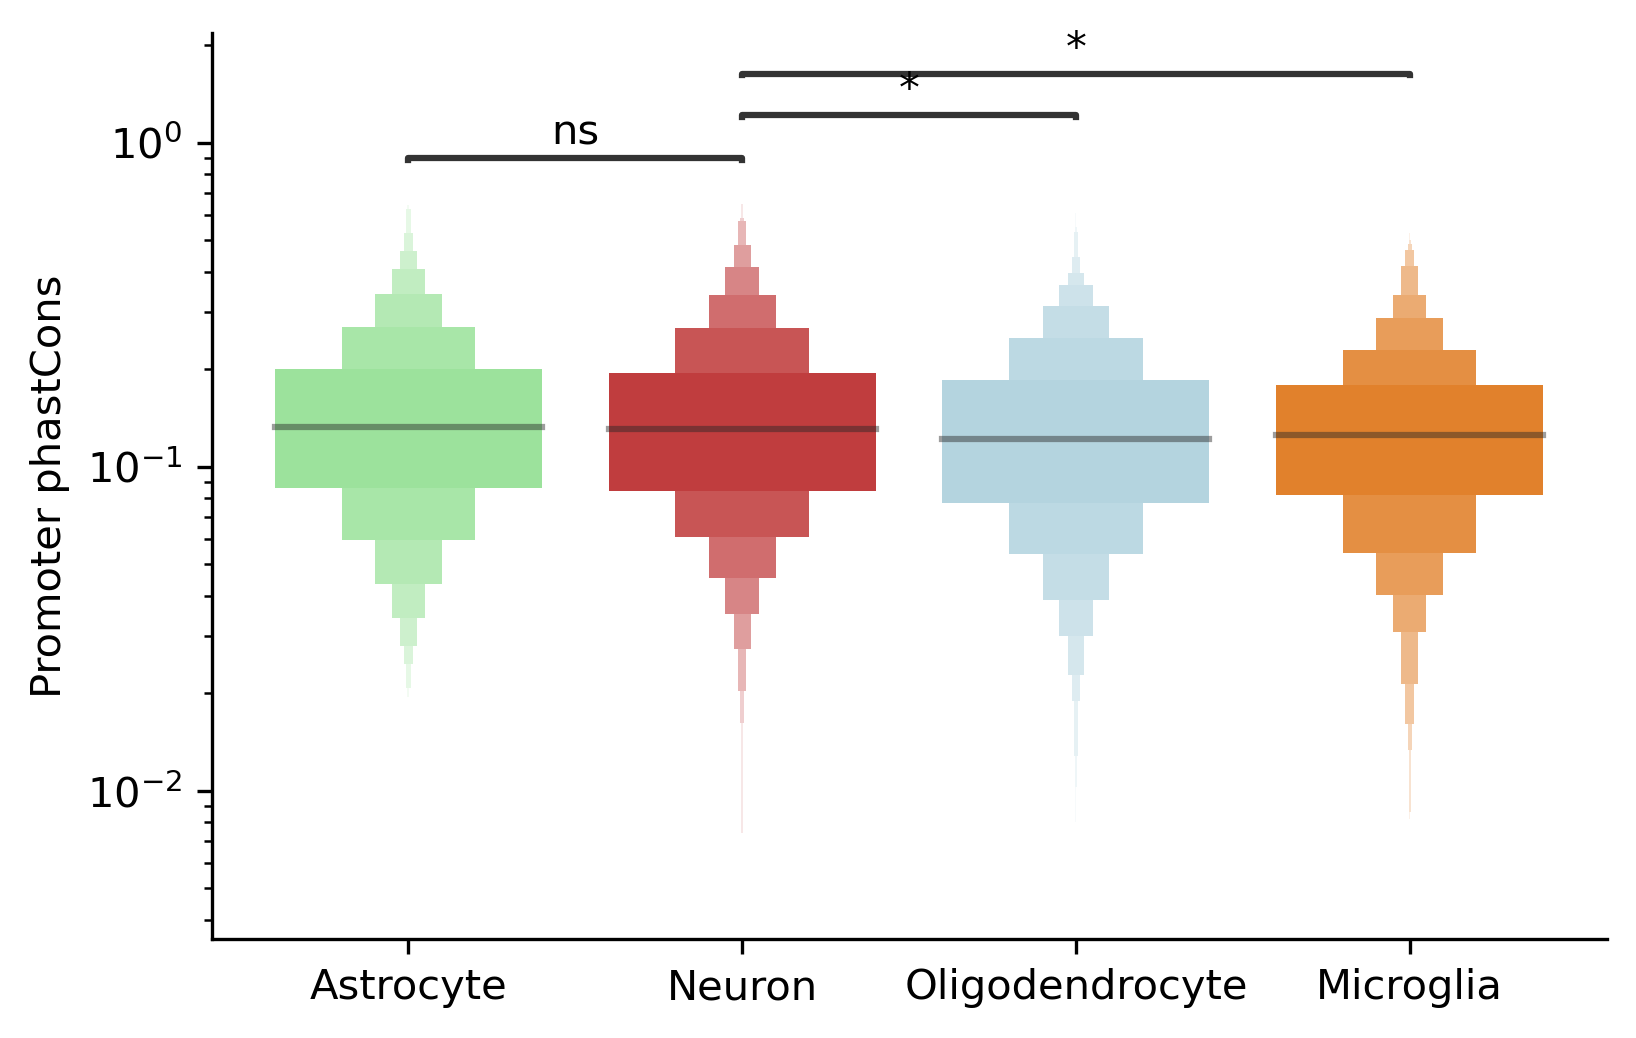

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set(yscale='log')
# ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='Avg_phastCons',
                 data=df[df['Celltype'].isin(['Neuron','Astrocyte','Oligodendrocyte','Microglia'])],
                 palette=palette,showfliers=False,outlier_prop=0,
                 order=['Astrocyte','Neuron','Oligodendrocyte','Microglia'])

# order=['Astrocyte','Neuron','Endothelia','Oligodendrocyte','Microglia','Glia']

ax.set(ylabel='Promoter phastCons',xlabel='')
sns.despine()
ax.set(yscale='log')
stat_annot = add_stat_annotation(ax=ax,data=df,x="Celltype", y="Avg_phastCons",
                        box_pairs=[("Astrocyte", "Neuron"),
                                   ("Neuron", "Oligodendrocyte"),
                                   ("Neuron","Microglia")],
                        test='Mann-Whitney', text_format='star',
                        loc='outside', verbose=2, 
                        comparisons_correction=None,
                        order=['Astrocyte','Neuron','Oligodendrocyte','Microglia'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels())
plt.autoscale()
plt.savefig('../figures/MannWhitney/phastcons/NAMO.png')
plt.show()

In [39]:
from scipy import stats

In [40]:
stats.kruskal(df[df['Celltype']=='Neuron']['Avg_phastCons'],
              df[df['Celltype']=='Endothelia']['Avg_phastCons'],
              df[df['Celltype']=='Astrocyte']['Avg_phastCons'],
              df[df['Celltype']=='Microglia']['Avg_phastCons'],
              df[df['Celltype']=='Oligodendrocyte']['Avg_phastCons'])

KruskalResult(statistic=13.68295924648318, pvalue=0.008378787378192627)

In [41]:
stats.kruskal(df[df['Celltype']=='Neuron']['Avg_phastCons'],
              df[df['Celltype']=='Endothelia']['Avg_phastCons'],
              df[df['Celltype']=='Glia']['Avg_phastCons'])

KruskalResult(statistic=9.45514196095685, pvalue=0.008847936769973523)